# KIAM 8

## Week 4 : Task 2

Objective: Explore the dataset to uncover patterns, identify data quality issues, and form hypotheses that will guide your feature engineering.

Use Jupyter Notebook (notebooks/eda.ipynb) for all exploratory work. This notebook is for exploration only; it is not for production code.

Instructions:

    1.	Overview of the Data:

        ○	Understand the structure of the dataset, including the number of rows, columns, and data types.

    2.	Summary Statistics

        ○	Understand the central tendency, dispersion, and shape of the dataset’s distribution.

    3.	Distribution of Numerical Features

        ○	Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

    4.	Distribution of Categorical Features

        ○	Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.

    5.	Correlation Analysis

        ○	Understanding the relationship between numerical features.

    6.	Identifying Missing Values

        ○	Identify missing values to determine missing data and decide on appropriate imputation strategies.

    7.	Outlier Detection

        ○	Use box plots to identify outliers.

    Deliverables:
    
    ●	Based on your findings, summarize your top 3–5 most important insights in your notebook.


In [8]:
# Import Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [10]:
# Import the Data
df=pd.read_csv('../data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [11]:
# Basic info
print(f"Dataset shape: {df.shape}")
print(f"\nColumn types:\n{df.dtypes}")
print(f"\nFirst few rows:\n{df.head()}")
print(f"\nDataset info:\n{df.info()}")

Dataset shape: (95662, 16)

Column types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First few rows:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_281

In [12]:
# Numerical features summary
print("Numerical Features Summary:")
print(df.describe())

# Categorical features summary
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts().head(10))

Numerical Features Summary:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

TransactionId value counts:
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905

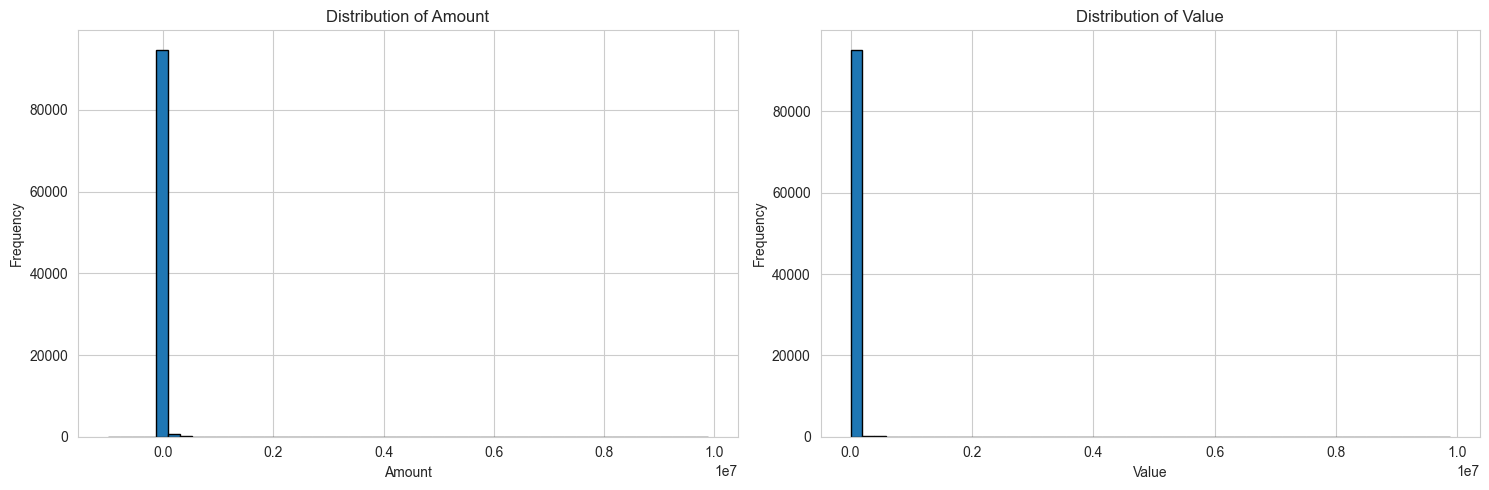

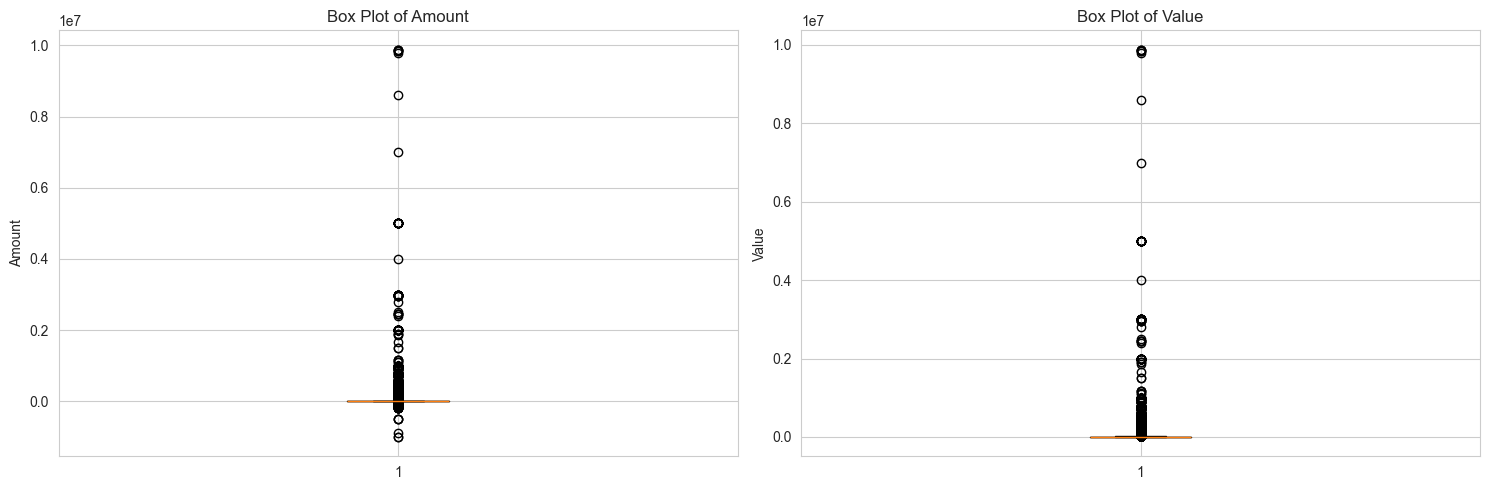

In [13]:
#Visualize Numerical Features

# Distribution of Amount and Value
numerical_cols = ['Amount', 'Value']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_ylabel(col)
plt.tight_layout()
plt.show()

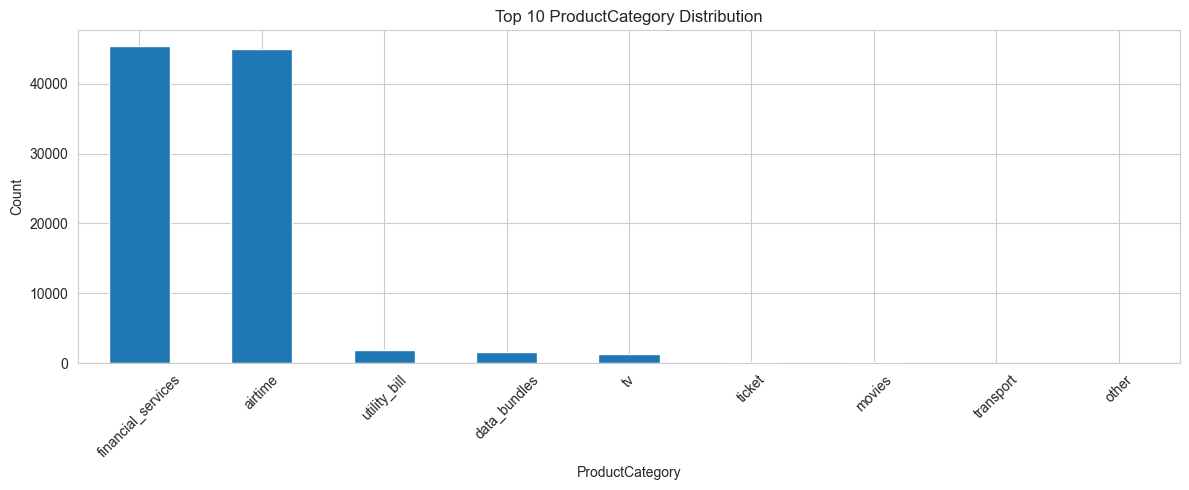

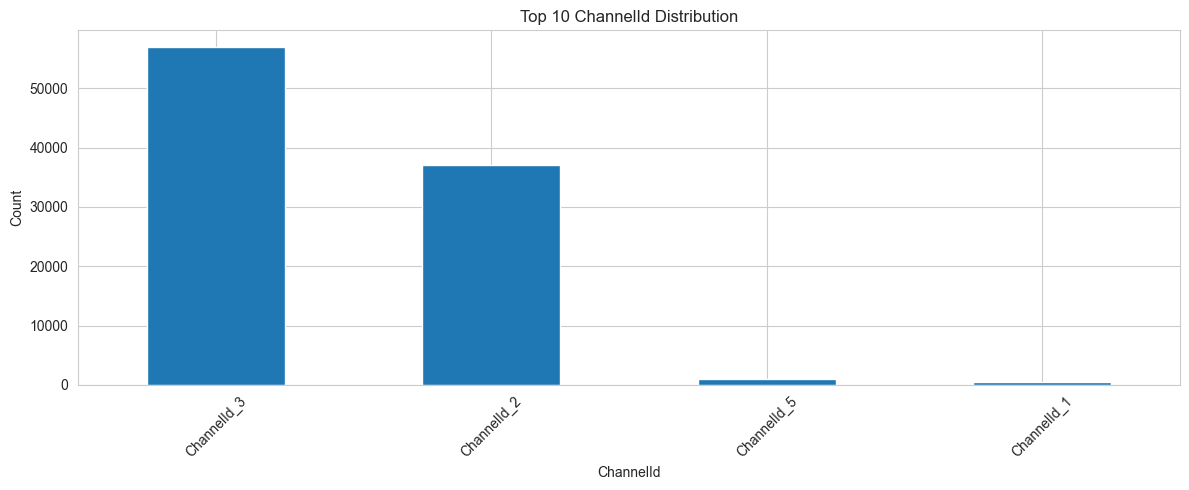

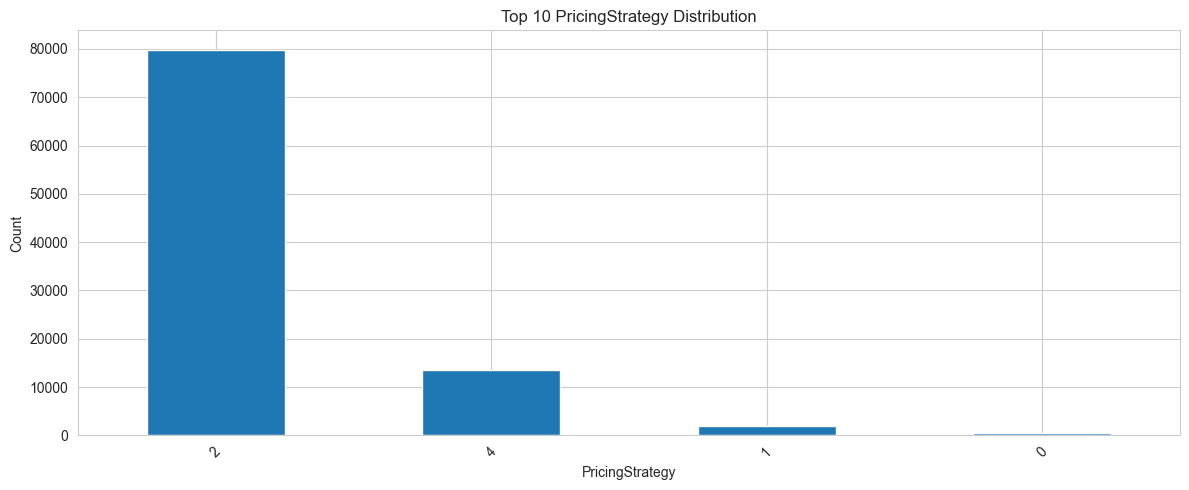

In [15]:
# Visualize Categorical Features
# Top categories visualization
categorical_features = ['ProductCategory', 'ChannelId', 'PricingStrategy']

for feature in categorical_features:
    plt.figure(figsize=(12, 5))
    df[feature].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 {feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Missing Values Summary:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []


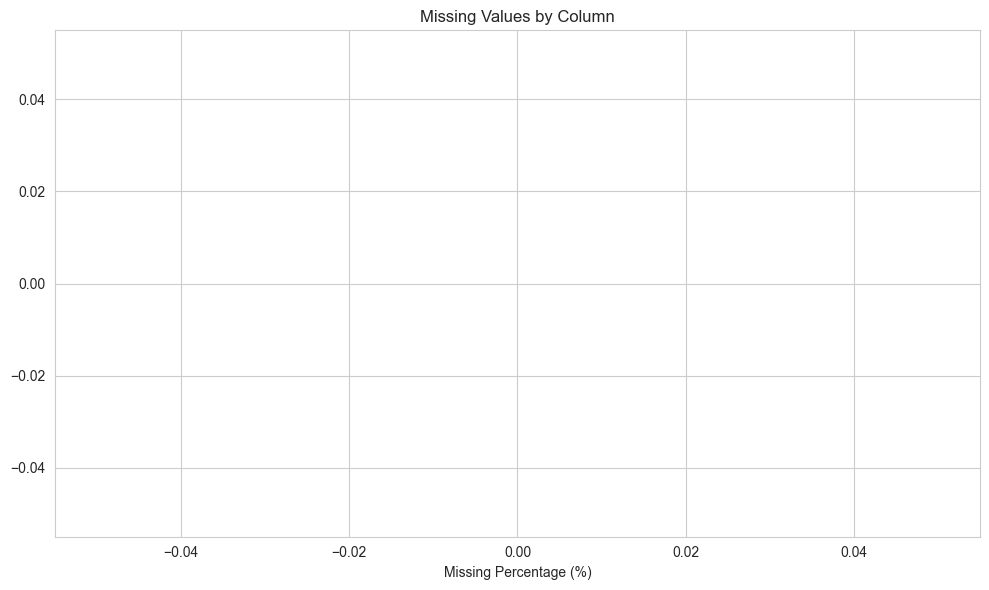

In [16]:
# Missing Values Analysis

# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

print("Missing Values Summary:")
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
plt.barh(missing_data['Column'], missing_data['Missing_Percentage'])
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Values by Column')
plt.tight_layout()
plt.show()

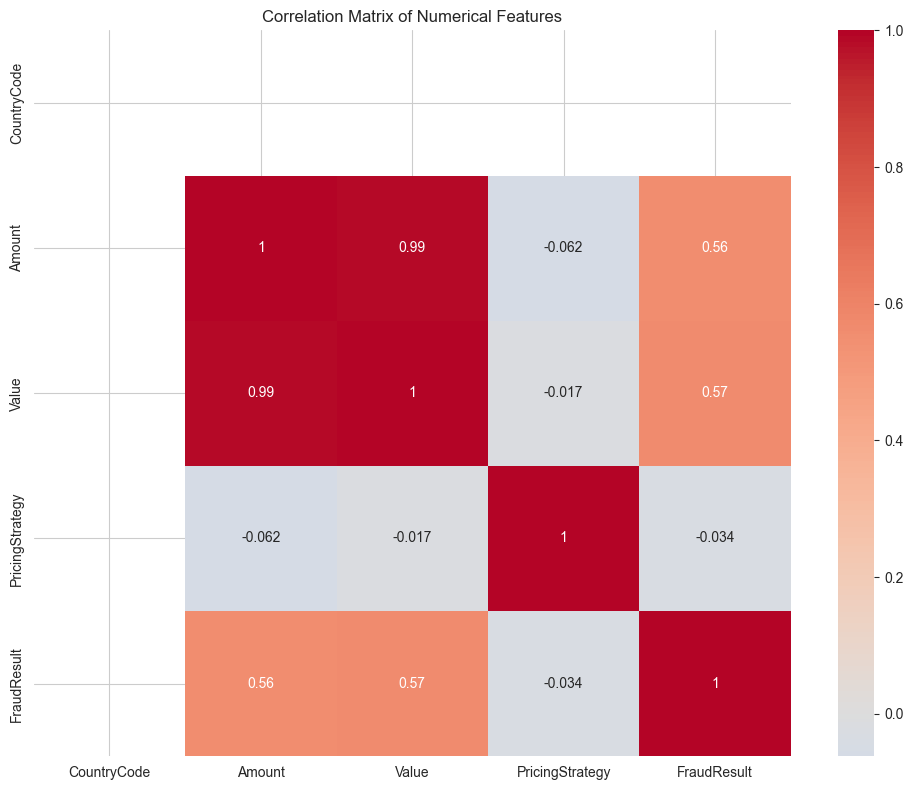

In [17]:
# Corelation Analysis

# Correlation matrix for numerical features
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [18]:
# Outlier Detection

# IQR method for outlier detection
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), (len(outliers) / len(df)) * 100

for col in ['Amount', 'Value']:
    count, percentage = detect_outliers_iqr(df, col)
    print(f"{col}: {count} outliers ({percentage:.2f}%)")

Amount: 24441 outliers (25.55%)
Value: 9021 outliers (9.43%)


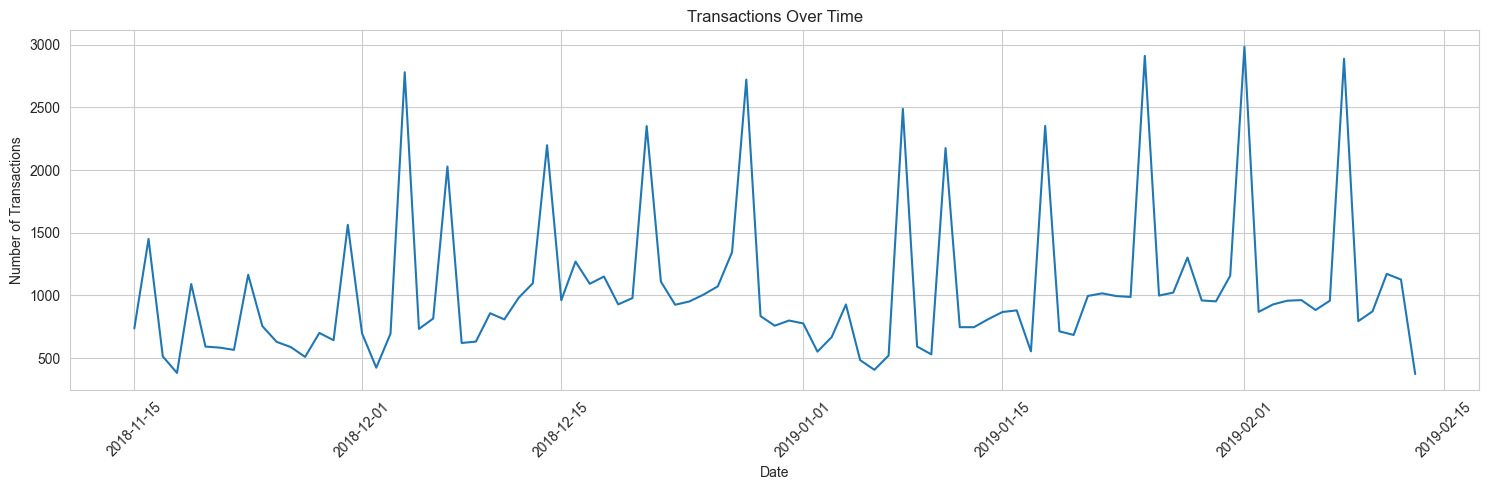

In [19]:
# Time Based Analysis

# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionDate'] = df['TransactionStartTime'].dt.date
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month

# Transactions over time
transactions_by_date = df.groupby('TransactionDate').size()
plt.figure(figsize=(15, 5))
plt.plot(transactions_by_date.index, transactions_by_date.values)
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The top key insights from the Exploratory Data Analysis (EDA) notebook are summarized below:

* **Target Imbalance:** The target variable, `FraudResult`, is highly imbalanced, with a fraud rate of only 0.2% of the total transactions.
* **Missing Data:** The dataset is clean, as no missing values were identified across any of the 16 columns.
* **Non-Predictive Features:** The `CountryCode` and `CurrencyCode` features are single-valued (always '256' and 'UGX', respectively) and will not provide any predictive power for the model.
* **Data Skewness and Outliers:** The numerical features `Amount` and `Value` are highly skewed and contain a significant number of outliers. Specifically, **25.55% of transactions are identified as outliers in the `Amount` column**, which will require transformation or robust scaling during feature engineering.
* **Categorical Dominance:** A small number of categories dominate the dataset:
    * The top two `ProductCategory` values (`financial_services` and `airtime`) account for the vast majority of transactions.
    * The top two `ProviderId` values (`ProviderId_4` and `ProviderId_6`) also account for a large share of the transactions.